In [ ]:
!pip install cvxpy
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Load file and into dateframe
monthlyClosing_inSample = 'monthly_closings_2018_to_2020.csv'
monthlyClosing_outSample = 'monthly_closings_2021.csv'

df1 = pd.read_csv(monthlyClosing_inSample)
df2 = pd.read_csv(monthlyClosing_outSample)

#Remove date
price = df1.iloc[:,1:]

#Calculate monthly return as percent change of monthly closing values, reset indices 
ret = price.pct_change().iloc[1:,:]
ret.reset_index(inplace = True, drop = True)

In [ ]:
df1.head()

,Date,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
0,2018-01-01,13.74,64.900764,27.397306,204.289993,9.464570,29.212917,65.913818,10.430466,53.549736,...,222.232788,218.483643,52.943863,7.32,164.870193,39.982342,60.957558,48.101372,102.605919,120.929955
1,2018-02-01,12.11,56.789257,26.595846,186.139999,9.257274,29.304205,61.587685,12.223202,50.842533,...,212.265274,205.409531,52.875637,5.83,162.738815,42.535130,54.352787,43.124111,102.988831,119.674240
2,2018-03-01,10.05,56.235203,25.398247,183.539993,9.667352,27.377983,60.756409,11.449066,51.999256,...,200.852341,192.592194,50.741047,6.96,155.848129,40.229286,54.898434,43.142376,98.057846,116.645149
3,2018-04-01,10.88,67.682632,25.379751,178.539993,9.806952,27.416567,58.421768,14.404930,49.542076,...,222.610748,170.544785,41.922886,7.93,156.890533,39.625057,60.538544,42.859261,96.996758,123.724594
4,2018-05-01,13.73,73.762344,25.130117,198.009995,10.212634,26.610199,57.699131,12.217362,51.278229,...,227.422699,173.036407,42.518581,6.71,165.790802,44.806568,62.351170,42.649212,95.902344,127.469086


In [ ]:
ret.head(6)

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
0,-0.118632,-0.124983,-0.029253,-0.088844,-0.021902,0.003125,-0.065633,0.171875,-0.050555,-0.045856,...,-0.044852,-0.059840,-0.001289,-0.203552,-0.012928,0.063848,-0.108350,-0.103474,0.003732,-0.010384
1,-0.170107,-0.009756,-0.045030,-0.013968,0.044298,-0.065732,-0.013497,-0.063333,0.022751,-0.103914,...,-0.053767,-0.062399,-0.040370,0.193825,-0.042342,-0.054210,0.010039,0.000424,-0.047879,-0.025311
2,0.082587,0.203563,-0.000728,-0.027242,0.014440,0.001409,-0.038426,0.258175,-0.047254,0.076413,...,0.108330,-0.114477,-0.173788,0.139368,0.006689,-0.015020,0.102737,-0.006562,-0.010821,0.060692
3,0.261949,0.089827,-0.009836,0.109051,0.041367,-0.029412,-0.012369,-0.151862,0.035044,0.115000,...,0.021616,0.014610,0.014209,-0.153846,0.056729,0.130763,0.029942,-0.004901,-0.011283,0.030265
4,0.091770,-0.006176,-0.021707,-0.063027,-0.041558,-0.025304,-0.072632,0.074324,-0.077993,0.013244,...,0.015858,0.004236,-0.126119,0.095380,0.009290,-0.005599,-0.001052,-0.079871,-0.026259,0.014863
5,0.222815,0.011998,0.055701,0.009163,-0.093044,0.095424,0.033677,0.039346,0.098506,-0.111877,...,0.035770,0.079300,0.041623,-0.027211,0.030164,0.027983,0.022398,0.028582,0.103167,0.032390


In [ ]:
# Compute the covariance matrix of the percent change of prices
Q = ret.cov().to_numpy()

# Compute the mean for each column 
mu = np.array(np.mean(ret, axis = 0))

# Store number of features（# of columns)
n = ret.shape[1] 
print(n)

25


Solve for the minimum variance portfolio

In [ ]:
# Create optimization variable w1, 25 total variables 
w1 = cp.Variable(n)

# Form the problem , minimize
constraints1 = [sum(w1) == 1 , w1 >= 0]
prob1 = cp.Problem(cp.Minimize(cp.quad_form(w1, Q)) , [sum(w1) == 1 , w1 >= 0])

#Solve Problem
prob1.solve(verbose=False)

0.0009278939303461065

In [ ]:
# matrix of allocations which offers the minimum variance 
w_minVar = w1.value 
w_minVar

array([ 2.34711076e-19,  5.74341943e-20,  8.04974643e-21,  8.47497298e-20,
        1.98801020e-20,  1.09424374e-20,  2.73065413e-20,  2.72299411e-19,
        5.54485957e-02,  1.08374508e-19,  8.96592846e-20,  6.59194971e-01,
       -6.72526425e-20,  2.57096580e-20,  1.76013193e-03,  8.87191244e-02,
        5.48842212e-02, -5.82451239e-20, -4.53773627e-19,  3.42087380e-20,
       -3.00374544e-20,  8.76648789e-20,  9.01180838e-02, -1.21197912e-21,
        4.98748717e-02])

In [ ]:
#Compute the variance of the portfolio
var_minVar = np.dot(w_minVar, np.dot(Q, w_minVar)) #variance

#Compute the return of the portfolio
ret_minVar = np.dot(mu, w_minVar) #expected return

print("return for Minimum Variance porfolio: " + str(ret_minVar))
print("variance for Minimum Variance porfolio: " + str(var_minVar))

return for Minimum Variance porfolio: 0.008653285914910979
variance for Minimum Variance porfolio: 0.0009278939303461066


Solve for the maximum return portfolio

In [ ]:
# Create optimization variable w2, 25 total variables 
w2 = cp.Variable(n)

constraints2 = [sum(w2) == 1, w2 >= 0]
prob2 = cp.Problem(cp.Maximize(mu.T@w2), constraints2)
                   
# Solve the problem 
prob2.solve(verbose=False)

0.1021163469313111

In [ ]:
# matrix of allocations which offers the optimized portfolio
w_maxRet = w2.value #solution value: maximum expected return
w_maxRet

array([4.00446549e-11, 2.33109317e-11, 2.11897368e-11, 2.02514107e-11,
       2.13526338e-11, 2.10766681e-11, 2.36702200e-11, 2.30281295e-11,
       2.20156300e-11, 1.84127151e-11, 1.42266925e-11, 1.97676588e-11,
       1.08469522e-09, 1.88147929e-11, 2.37055006e-11, 1.85314364e-11,
       2.26815434e-11, 2.41212013e-11, 9.99999998e-01, 1.68558540e-11,
       8.78989931e-12, 2.30303345e-11, 2.19747289e-11, 2.02437383e-11,
       1.72961027e-11])

In [ ]:
#Compute the variance of the portfolio
var_maxRet = np.dot(w_maxRet, np.dot(Q, w_maxRet)) #variance

#Compute the return of the portfolio
ret_maxRet = np.dot(mu, w_maxRet) #expected return

print("return for Max Return porfolio: " + str(var_maxRet))
print("variance for Max Return porfolio: " + str(ret_maxRet))

return for Max Return porfolio: 0.3397485196506799
variance for Max Return porfolio: 0.10211634693131112


## Compute classical Markowitz efficent frontier

In [ ]:
#Create tareget ranges for portfolio returns
targetLen = 50
target_Return = np.linspace(ret_minVar,ret_maxRet,targetLen)
target_Return

array([0.00865329, 0.0105607 , 0.0124681 , 0.01437551, 0.01628292,
       0.01819033, 0.02009774, 0.02200515, 0.02391256, 0.02581997,
       0.02772738, 0.02963479, 0.0315422 , 0.03344961, 0.03535702,
       0.03726443, 0.03917184, 0.04107925, 0.04298666, 0.04489406,
       0.04680147, 0.04870888, 0.05061629, 0.0525237 , 0.05443111,
       0.05633852, 0.05824593, 0.06015334, 0.06206075, 0.06396816,
       0.06587557, 0.06778298, 0.06969039, 0.0715978 , 0.07350521,
       0.07541262, 0.07732002, 0.07922743, 0.08113484, 0.08304225,
       0.08494966, 0.08685707, 0.08876448, 0.09067189, 0.0925793 ,
       0.09448671, 0.09639412, 0.09830153, 0.10020894, 0.10211635])

In [ ]:
# Define optimization problem and compute one portfolio on efficient frontier
w = cp.Variable(n)
eps = cp.Parameter()

constraints3 = [mu.T@w >= eps, sum(w) == 1, w >= 0]
prob3 = cp.Problem(cp.Minimize(cp.quad_form(w, Q)), constraints3)

In [ ]:
# Compute classical efficient frontier
w_front_clas = []
var_front_clas = []
ret_front_clas = []
for epsilon in target_Return:
    eps.value = epsilon
    prob3.solve()
    w_front_clas.append(w.value)
    var_front_clas.append(np.dot(w.value, np.dot(Q, w.value)))
    ret_front_clas.append(np.dot(mu, w.value))

In [ ]:
len(var_front_clas)

50

# Compute the resampled efficient frontier

In [ ]:
x_resample = np.random.multivariate_normal(mu, Q, 36)
mu_resample = np.array(np.mean(x_resample, axis = 0))
mu_resample

array([ 0.09906692,  0.01878305,  0.0099055 ,  0.01887402,  0.00915425,
        0.01365211,  0.0032478 ,  0.07200775,  0.02001697,  0.02322111,
        0.04336486,  0.01429292,  0.09433791,  0.00855284, -0.03174073,
        0.02087502, -0.00117878, -0.01067452,  0.16636933,  0.02915831,
        0.05736959,  0.00158439,  0.01601157,  0.01425249,  0.02412148])

In [ ]:
sample_size = ret.shape[0] 
repetition = 100

#set variables for storing resuts
weight_resample_all = []
var_resample_all = []
ret_resample_all = []
mu_resample_100 = []
Q_resample_100 = []
var_minVar_100 = []
ret_minVar_100 = []
var_maxRet_100 = []
ret_maxRet_100 = []

#Use a random seed so that results will be consistent 
np.random.seed(15)

#Resample by taking n (sample size) draws from the original input
weight_resample_all = []
for i in range(repetition):
    
    
    #resample by drawing from the multivariate normal distribution with mu and Q
    x_resample = np.random.multivariate_normal(mu, Q, 36)
    
    #Calculate the new mean vector (mu_resample) and new variance-covariance matrix (Q _resample) 
    #resampled mu and Q
    mu_resample = np.array(np.mean(x_resample, axis = 0))
    mu_resample_100.append(mu_resample)
    x_resample_df = pd.DataFrame(x_resample)
    Q_resample = x_resample_df.cov().to_numpy()
    Q_resample_100.append(Q_resample)
    
    #Compute minimum variance
    w_resam_1 = cp.Variable(n)
    # Form the problem , minimize
    constraints4 = [sum(w_resam_1) == 1 , w_resam_1 >= 0]
    prob4 = cp.Problem(cp.Minimize(cp.quad_form(w_resam_1, Q_resample)), constraints4)
    #Solve Problem
    prob4.solve(verbose=False)

    w_minVar = w_resam_1.value #solution value: minimum variance
    var_minVar = np.dot(w_minVar, np.dot(Q_resample, w_minVar)) #variance
    ret_minVar = np.dot(mu_resample, w_minVar) #expected return
    var_minVar_100.append(var_minVar)
    ret_minVar_100.append(ret_minVar)

    #compute maximum expected return
    w_resam_2 = cp.Variable(n)
    constraints5 = [sum(w_resam_2) == 1, w_resam_2 >= 0]
    prob5 = cp.Problem(cp.Maximize(mu_resample.T@w_resam_2), constraints5)

    # Solve the problem 
    prob5.solve(verbose=False)

    w_maxRet = w_resam_2.value #solution value: maximum expected return
    var_maxRet = np.dot(w_maxRet, np.dot(Q_resample, w_maxRet)) #variance
    ret_maxRet = np.dot(mu_resample, w_maxRet) #expected return
    var_maxRet_100.append(var_maxRet)
    ret_maxRet_100.append(ret_maxRet)

    #target return
    targetRet = np.linspace(ret_minVar,ret_maxRet,50)
    
    # Define optimization problem and compute one portfolio on efficient frontier
    w_re = cp.Variable(n)
    eps_re = cp.Parameter()
    
    constraints6 = [mu_resample.T@w_re >= eps_re, sum(w_re) == 1, w_re >= 0]
    prob6 = cp.Problem(cp.Minimize(cp.quad_form(w_re, Q_resample)), constraints6)

    # Compute efficient frontier
    w_front_re = []
    var_front_re = []
    ret_front_re = []

    for epsilon in targetRet:
        eps_re.value = epsilon
        
        #solve problem for each epsilon
        prob6.solve(solver = 'ECOS')

        w_front_re.append(w_re.value)
        var_front_re.append(np.dot(w_re.value, np.dot(Q_resample, w_re.value)))
        ret_front_re.append(np.dot(mu_resample, w_re.value))
    
    #Store results for each resampling
    weight_resample_all.append(w_front_re)
    var_resample_all.append(var_front_re)
    ret_resample_all.append(ret_front_re)

In [ ]:
#compute the average weights at each return level(epsilon)
weight_resample_all_ar = np.array(weight_resample_all)
ave_weight_front = np.average(weight_resample_all_ar, axis = 0)
print(ave_weight_front.shape)

#compute the resampled efficient frontier based on the average weights and orignial mu & Q
var_front_resample = []
ret_front_resample = []
for weight_50 in ave_weight_front:
  var_front_resample.append(np.dot(weight_50, np.dot(Q, weight_50)))
  ret_front_resample.append(np.dot(mu, weight_50))

(50, 25)


In [ ]:
ave_weight_front

array([[ 7.01690028e-04,  7.41020298e-10,  4.41681200e-09, ...,
         8.17027959e-02,  2.06214327e-02,  3.84545992e-02],
       [ 2.87173231e-03,  3.85228126e-05,  1.89709706e-09, ...,
         6.11673292e-02,  2.15372086e-02,  6.00075660e-02],
       [ 8.82003503e-03,  1.60209188e-04,  1.33705923e-09, ...,
         4.68253692e-02,  2.22072120e-02,  7.85443214e-02],
       ...,
       [ 2.13674948e-01, -1.21879744e-12,  1.96835473e-11, ...,
         2.10935446e-11,  2.47303102e-04,  7.29010744e-04],
       [ 1.93276499e-01, -7.96377316e-12,  5.55212147e-12, ...,
         4.24627777e-12,  1.28267286e-11,  2.99659025e-04],
       [ 1.70000002e-01,  1.35069186e-10,  1.80610591e-10, ...,
         1.76003824e-10,  2.01227055e-10,  2.26665422e-10]])

In [ ]:
var_front_resample

[0.000964015007138589,
 0.0009956894726169084,
 0.0010625255390182165,
 0.0011599692029793112,
 0.0012858573960349887,
 0.0014469213178189522,
 0.0016450712471442644,
 0.0018784840523379891,
 0.002144222504393473,
 0.002443419936600746,
 0.002780842085106743,
 0.003157340774170291,
 0.0035718749713409964,
 0.004024655961631167,
 0.004516776224431739,
 0.00504701767608124,
 0.0056137815413464884,
 0.006219230381635508,
 0.006865443412317591,
 0.007548377025747407,
 0.008277625545251785,
 0.009044461400651113,
 0.009832505561507884,
 0.010643660903935506,
 0.011489372913679251,
 0.01237609903491893,
 0.013308440240073494,
 0.014270936508762155,
 0.015289805945506413,
 0.016394621679252177,
 0.017594599510076844,
 0.018899159931431087,
 0.02032046238621737,
 0.021855701133400435,
 0.02351176767244612,
 0.025340791845197008,
 0.027367548214214266,
 0.02973246319373489,
 0.032395930126550065,
 0.0353050843431702,
 0.03847322485322217,
 0.04207405688483186,
 0.046076103654834735,
 0.05078607

In [ ]:
weight_resample_all_ar = np.array(weight_resample_all)
weight_resample_all_ar.shape

(100, 50, 25)

## Part 2

**Using the frontiers, compute three portfolio weights (minimum variance, maximum return, and Sharpe ratio) along both the classical and resampled frontiers.**

On the classical efficient frontier, find the weights for minimum variance, maximum return and Sharp ratio porfolio.

In [ ]:
# weights for Minimum Variance.
classic_weights_minVar = w_front_clas[0] #[0] means we take the first weight combo in the frontier weights which represent the minVar portfolio.
print(classic_weights_minVar)

[ 3.27231831e-19 -1.14158479e-20 -8.31044264e-22  1.11997265e-19
  1.90860299e-20  1.70009911e-20 -2.67194251e-20  8.07705709e-20
  5.54485957e-02  8.99771706e-20  9.08772980e-20  6.59194971e-01
  9.71760135e-20  3.48214411e-20  1.76013193e-03  8.87191244e-02
  5.48842212e-02 -8.25234018e-20 -1.26897129e-20  4.97872186e-20
  4.42501729e-20  2.33161871e-20  9.01180838e-02  8.74792459e-21
  4.98748717e-02]


In [ ]:
# weights for Minimum Variance - resampling
resample_weights_minVar = ave_weight_front[0]
print(resample_weights_minVar)

[7.01690028e-04 7.41020298e-10 4.41681200e-09 2.88902098e-03
 4.47605105e-03 1.83839002e-09 9.75247033e-10 5.62971326e-03
 2.54208074e-02 9.60949192e-05 5.45243228e-03 6.41067220e-01
 6.13428358e-05 3.06105501e-02 1.74025173e-02 6.92591394e-02
 5.47829817e-02 2.36796868e-05 4.85218823e-04 4.50878577e-09
 8.62699280e-04 1.05794475e-09 8.17027959e-02 2.06214327e-02
 3.84545992e-02]


In [ ]:
# weights for Maximum Return 
classic_weights_maxRet = w_front_clas[targetLen - 1]
print(classic_weights_maxRet)

[-3.69310785e-06 -1.73732232e-05 -1.46513622e-05 -1.39387928e-05
 -1.48461009e-05 -1.45522788e-05 -1.78618558e-05 -1.64950255e-05
 -1.54703989e-05 -1.27246575e-05 -1.08433441e-05 -1.35992466e-05
  3.02308681e-03 -1.29547906e-05 -1.79986306e-05 -1.28098616e-05
 -1.61873492e-05 -1.93337499e-05  9.97301088e-01 -1.19644126e-05
 -8.72463646e-06 -1.66768143e-05 -1.53960167e-05 -1.39080658e-05
 -1.21554690e-05]


In [ ]:
# weights for Maximum Return - resampling
resample_weights_maxRet = ave_weight_front[targetLen - 1]
print(resample_weights_maxRet)

[1.70000002e-01 1.35069186e-10 1.80610591e-10 1.80388867e-10
 1.78797965e-10 1.80912535e-10 1.49959154e-10 1.94863104e-10
 1.68062136e-10 1.91755826e-10 2.24624977e-10 2.14869701e-10
 3.39999999e-01 2.05784416e-10 1.30889509e-10 2.00542880e-10
 1.58848619e-10 1.10868970e-10 4.89999995e-01 2.13367475e-10
 2.77643440e-10 1.47183375e-10 1.76003824e-10 2.01227055e-10
 2.26665422e-10]


In [ ]:
#Compute sharp ratio and identify the portfolio with the highest sharpe ratio
riskFreeRate = 0.002

ret_array_clas = np.array(ret_front_clas)
var_array_clas = np.array(var_front_clas)

sharpe_array_clas = (ret_array_clas - riskFreeRate)/np.sqrt(var_array_clas)

classic_weights_sharpe = w_front_clas[sharpe_array_clas.argmax()]
print(sharpe_array_clas)
print(sharpe_array_clas.argmax())
print(classic_weights_sharpe)

[0.21841729 0.27797437 0.32773841 0.36826892 0.40084006 0.42615505
 0.44633031 0.4624906  0.47545637 0.48589632 0.49435103 0.50109046
 0.50645874 0.51074942 0.5141787  0.51666607 0.51850325 0.51976041
 0.52057517 0.52104411 0.52124292 0.52123104 0.52105527 0.52075255
 0.52035209 0.51987708 0.51934591 0.51877323 0.51817071 0.51754764
 0.51691144 0.51626799 0.51562199 0.51497714 0.51433639 0.51370202
 0.51305877 0.51222578 0.50606699 0.49190377 0.47256729 0.4507326
 0.42825704 0.40634554 0.38566497 0.34299185 0.28488889 0.23609746
 0.19944177 0.17218151]
20
[ 3.03145246e-01 -5.30561024e-06 -1.62004752e-06 -6.56583631e-07
 -1.61935898e-06 -1.94628171e-06 -4.55772788e-06 -5.86979133e-06
 -2.61723444e-06 -1.03464147e-06 -4.15306274e-07  4.07769810e-01
  1.68198785e-01 -9.44505366e-07 -2.72697665e-06 -7.81266516e-07
 -1.57975037e-06 -3.63964216e-06  2.27431086e-02 -6.76639004e-07
  9.81855846e-02 -3.04851736e-06 -1.16261019e-06 -1.51716197e-06
 -8.15205306e-07]


In [ ]:
#Compute sharp ratio for resampled data and identify the portfolio with the highest sharpe ratio
riskFreeRate = 0.002

ret_array_resample = np.array(ret_front_resample)
var_array_resample = np.array(var_front_resample)

sharpe_array_resample = (ret_array_resample - riskFreeRate)/np.sqrt(var_array_resample)

resample_weights_sharpe = ave_weight_front[sharpe_array_resample.argmax()]
print(sharpe_array_resample)
print(sharpe_array_resample.argmax())
print(resample_weights_sharpe)

[0.21312606 0.25273912 0.29038922 0.32504232 0.35567227 0.3822775
 0.40394768 0.42176075 0.43564073 0.44635722 0.45463077 0.46149229
 0.46685351 0.47085292 0.47383582 0.47622275 0.47826705 0.48003351
 0.48149973 0.48294265 0.48443787 0.48557416 0.48631134 0.48673288
 0.48660721 0.48586637 0.48493204 0.48399334 0.48237749 0.47945073
 0.47558029 0.47094583 0.46591422 0.46030599 0.45430872 0.4475569
 0.44014776 0.43126375 0.42180614 0.41228958 0.40250347 0.39174826
 0.38070943 0.36855166 0.35495156 0.34132182 0.32851581 0.31538419
 0.30041097 0.28704812]
23
[2.67505266e-01 1.27235785e-03 1.36536559e-10 1.56298003e-02
 5.84644562e-03 1.12606602e-10 5.06528378e-11 2.47873235e-03
 5.23049891e-03 1.01457382e-03 3.37134571e-03 1.81728289e-01
 2.06543922e-01 2.86493202e-02 6.04572796e-03 4.68201958e-02
 1.14609818e-03 4.22194995e-11 6.31504945e-02 3.08520702e-10
 1.11448087e-01 6.35181912e-11 2.52939710e-03 4.26066652e-03
 4.53287802e-02]


In [ ]:
#We want return for the whole year so only use first and last month
price2021 = df2.iloc[:,1:]
price2021_ = price2021.drop(price2021.index[1:11])
price2021_.reset_index(inplace = True, drop = True)

#Compute percent change
ret_2021 = price2021_.pct_change().iloc[1:,:]
ret_2021

,AMD,OXY,XLF,BABA,F,BAC,CCL,AMC,DAL,FB,...,UNH,MMM,AAL,MULN,QQQ,AAPL,XLE,FXI,JPM,V
1,0.68029,0.446726,0.366112,-0.53201,0.982391,0.522067,0.077665,1.051282,0.029505,0.302017,...,0.521509,0.043312,0.04601,-0.584591,0.269255,0.353931,0.458557,-0.256478,0.261573,0.128286


In [ ]:
#From classical frontier find Minimum variance portfolio
classic_minVar_ret2021 = np.dot(ret_2021, classic_weights_minVar)
print(classic_minVar_ret2021)

#Maximum return portfolio
classic_maxRet_ret2021 = np.dot(ret_2021, classic_weights_maxRet)
print(classic_maxRet_ret2021)

#Sharpe ratio portfolio
classic_sharpe_ret2021 = np.dot(ret_2021, classic_weights_sharpe)
print(classic_sharpe_ret2021)

[0.02822425]
[-0.58210478]
[0.27956668]


In [ ]:
#Compute returns on $1000

print('Out-of-sample returns on $1000 investment: \n')
print('On the Classical Efficient Frontier, the minimum variance portfolio returns $' , classic_minVar_ret2021*1000)
print('On the Classical Efficient Frontier, the maximum return portfolio returns $' , classic_maxRet_ret2021*1000)
print('On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , classic_sharpe_ret2021*1000 , '\n')

Out-of-sample returns on $1000 investment: 

On the Classical Efficient Frontier, the minimum variance portfolio returns $ [28.22424688]
On the Classical Efficient Frontier, the maximum return portfolio returns $ [-582.10477944]
On the Classical Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [279.56668474] 



Calculate the return for resampled frontier

In [ ]:
#From classical frontier find Minimum variance portfolio
resample_minVar_ret2021 = np.dot(ret_2021, resample_weights_minVar)
print(resample_minVar_ret2021)

#Maximum return portfolio
resample_maxRet_ret2021 = np.dot(ret_2021, resample_weights_maxRet)
print(resample_maxRet_ret2021)

#Sharpe ratio portfolio
resample_sharpe_ret2021 = np.dot(ret_2021, resample_weights_sharpe)
print(resample_sharpe_ret2021)


[0.05915957]
[-0.05800687]
[0.30304251]


In [ ]:
#Compute returns on $1000
print('On the Resampled Efficient Frontier, the minimum variance portfolio returns $' , resample_minVar_ret2021*1000)
print('On the Resampled Efficient Frontier, the maximum return portfolio returns $' , resample_maxRet_ret2021*1000)
print('On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $' , resample_sharpe_ret2021*1000)

On the Resampled Efficient Frontier, the minimum variance portfolio returns $ [59.15956556]
On the Resampled Efficient Frontier, the maximum return portfolio returns $ [-58.00687383]
On the Resampled Efficient Frontier, the optimal Sharpe ratio portfolio returns $ [303.04250642]


## Q3: Plot the classical and resampled efficient frontiers

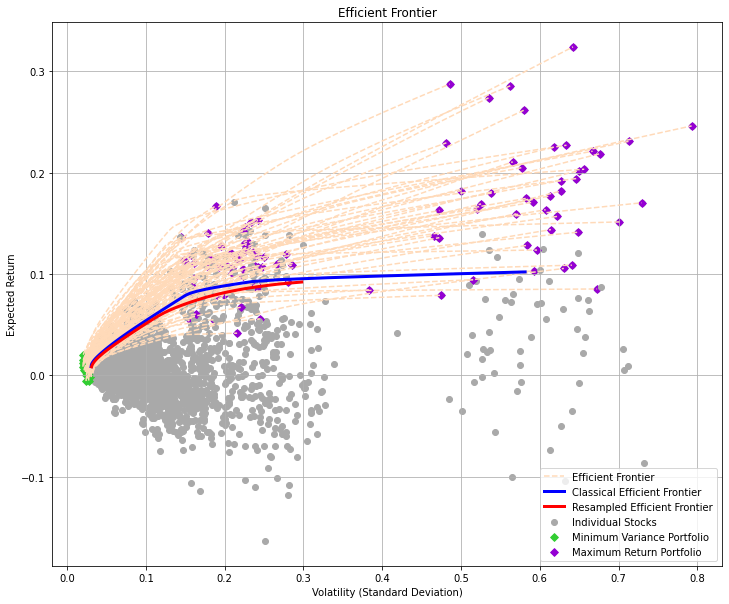

In [ ]:
axC = plt.gca()
plt.rcParams['figure.figsize'] = [10, 8]

for i in range(repetition):
    # Plot volatility versus expected return for individual stocks
    axC.scatter(x=np.sqrt(np.diag(Q_resample_100[i])), y=mu_resample_100[i], color='darkgray', label='Individual Stocks' if i == 0 else "")
    
    # Plot volatility versus expected return for mimimum variance portfolio
    axC.scatter(x=np.sqrt(var_minVar_100[i]), y=ret_minVar_100[i], marker='D', s=30,  color='limegreen', label='Minimum Variance Portfolio' if i == 0 else "")

    # Plot volatility versus expected return for maximum return portfolio
    axC.scatter(x=np.sqrt(var_maxRet_100[i]), y=ret_maxRet_100[i],  marker='D', s=30, color='darkviolet', label='Maximum Return Portfolio' if i == 0 else "")

    # Plot efficient frontier
    axC.plot(np.sqrt(var_resample_all[i]), ret_resample_all[i], '--', color='peachpuff', label='Efficient Frontier' if i == 0 else "")

#Plot the classical mean-variance efficient frontier
axC.plot(np.sqrt(var_front_clas), ret_front_clas, color='blue', linewidth=3, label='Classical Efficient Frontier')

#Plot the resampled efficient frontier
axC.plot(np.sqrt(var_front_resample), ret_front_resample, color='red', linewidth=3, label='Resampled Efficient Frontier')

axC.set_xlabel('Volatility (Standard Deviation)')
axC.set_ylabel('Expected Return')
plt.title('Efficient Frontier')
axC.legend(loc="lower right")
axC.grid()
plt.show()

## Part 4. Plot the portfolio compositions for classical and resampled frontiers.

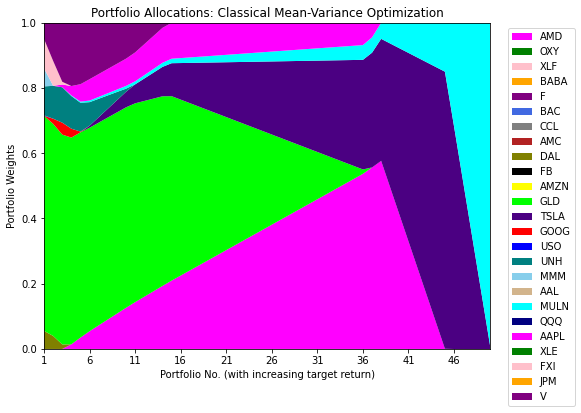

In [ ]:
#plot portfolio compositions for classical frontiers
x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black',
              'yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8, 6))
plt.stackplot(x_tick, np.array(w_front_clas).T, colors=color_list)
plt.legend(df1.columns[1:], bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Classical Mean-Variance Optimization")
plt.show()

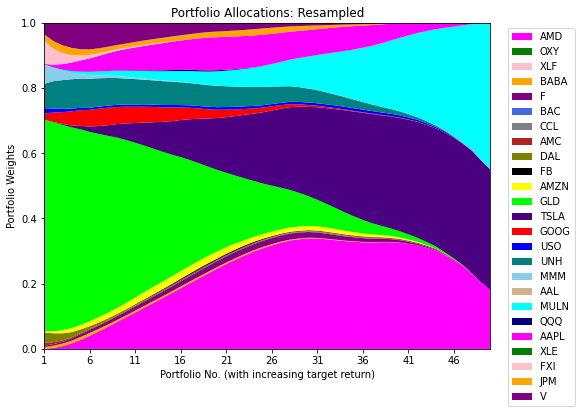

In [ ]:
#plot portfolio compositions for classical frontiers
x_tick = np.arange(len(targetRet))+1
color_list = ['fuchsia','green','pink','orange','purple','royalblue','grey','firebrick','olive','black',
              'yellow','lime','indigo','red','blue','teal','skyblue','tan','cyan','navy']
plt.figure(figsize=(8, 6))
plt.stackplot(x_tick, np.array(ave_weight_front).T, colors=color_list)
plt.legend(df1.columns[1:], bbox_to_anchor=(1.2, 1))
plt.xlim((1,len(targetRet)))
plt.ylim((0,1))
plt.xticks(np.arange(1,len(targetRet)+1,5))
plt.xlabel("Portfolio No. (with increasing target return)")
plt.ylabel("Portfolio Weights")
plt.title("Portfolio Allocations: Resampled")
plt.show()